## Лабораторна робота 4

В якості текстової моделі використати модель «Сумка слів». Виконати
класифікацію за допомогою алгоритмів наївний
байєсів класифікатор та випадкові ліси, порівняти їх точність. Спробувати
покращити моделі за допомогою  GridSearchCV.


Попередня обробка даних

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Зчитуємо дані з файлу
data = pd.read_csv('news.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16990 non-null  object
 1   label   16990 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 265.6+ KB


In [4]:
data.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Функція для виконання попередньої обробки тексту
def preprocess_text(text):
    # Токенізація
    tokens = word_tokenize(text)
    
    # Видалення зайвих символів
    tokens = [word for word in tokens if word.isalnum()]
    
    # Перетворення в нижній регістр
    tokens = [word.lower() for word in tokens]
    
    # Видалення стоп-слів
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Лематизація
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Повертаємо оброблений текст у вигляді рядка
    return ' '.join(tokens)

In [12]:
# Зразок тексту
text_example = data.iloc[0]['text']
text_example

"Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more  https://t.co/QPN8Gwl7Uh"

In [13]:
# Оброблений текст
preprocess_text(text_example)

'thursday biggest analyst call apple amazon tesla palantir docusign exxon amp http'

In [17]:
from sklearn.model_selection import train_test_split

# Розділяємо дані на ознаки та цільову змінну
X = data['text']
y = data['label']

# Розділяємо дані на навчальний і тестувальний набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Попередня обробка тексту для навчального та тестового наборів
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

# Вивдення декількох рядків з тренувального набору
X_train_preprocessed.head()

12164    u bank stock jumped nearly two month friday ci...
10984    uk retailer see biggest squeeze since pandemic...
12827    26 democrat said would prefer president biden ...
811      millennium partner uk regulatory announcement ...
12852    endp white house eye limited abortion health e...
Name: text, dtype: object

Побудова Сумки слів

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Побудова моделі TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

Побудова та порівняння моделей

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


# Побудова моделей
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier()

# Навчання моделей 
nb_classifier.fit(X_train_vectorized, y_train)
rf_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [ ]:
# Використання моделей
nb_pred = nb_classifier.predict(X_test_vectorized)
rf_pred = rf_classifier.predict(X_test_vectorized)

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def print_metrics(y_true, y_pred):
    """Compute and print model metrics:
    1.Accuracy
    2.Precision
    3.Recall
    4.F1-Score"""
    
    # Обчислення метрик 
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision = precision_score(y_true, y_pred, average='weighted',  zero_division=0)
    model_recall = recall_score(y_true, y_pred, average='weighted',  zero_division=0)
    model_f1 = f1_score(y_true, y_pred, average='weighted',  zero_division=0)

    # Вивід метрик
    print(f"Accuracy: {model_accuracy}")
    print(f"Precision: {model_precision}")
    print(f"Recall: {model_recall}")
    print(f"F1-Score: {model_f1}")
    

In [78]:
# Вивдення матриці заплутаності
def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix"""
    
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [83]:
# Метрики Наївного Баєса
print('Naive Bayes Classifier:\n')
print_metrics(y_test, nb_pred)

# Метрики Випадкового лісу
print('\nRandom Forest Classifier:\n')
print_metrics(y_test, rf_pred)

Naive Bayes Classifier:

Accuracy: 0.6065332548557976
Precision: 0.7222143585126949
Recall: 0.6065332548557976
F1-Score: 0.5626614685666059

Random Forest Classifier:

Accuracy: 0.7886992348440259
Precision: 0.8010566286812867
Recall: 0.7886992348440259
F1-Score: 0.78441917442345


Naive Bayes Classifier:


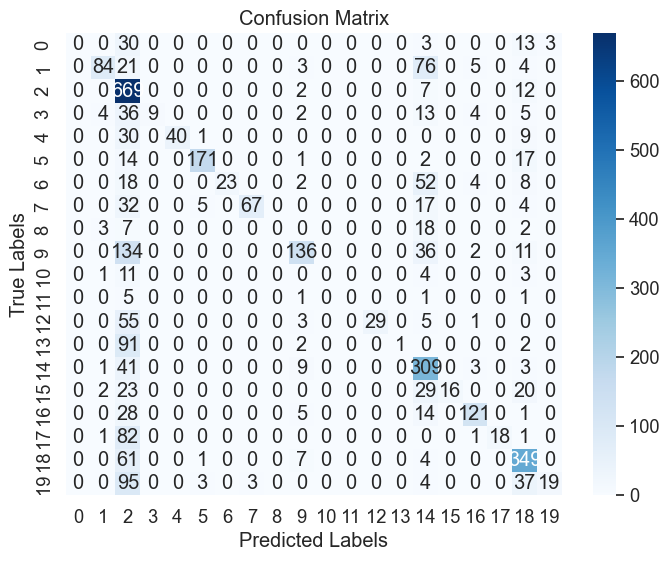

In [79]:
# Матриця заплутаності для Наївного Баєса
print('Naive Bayes Classifier:')
plot_confusion_matrix(y_test, nb_pred)

Random Forest Classifier:


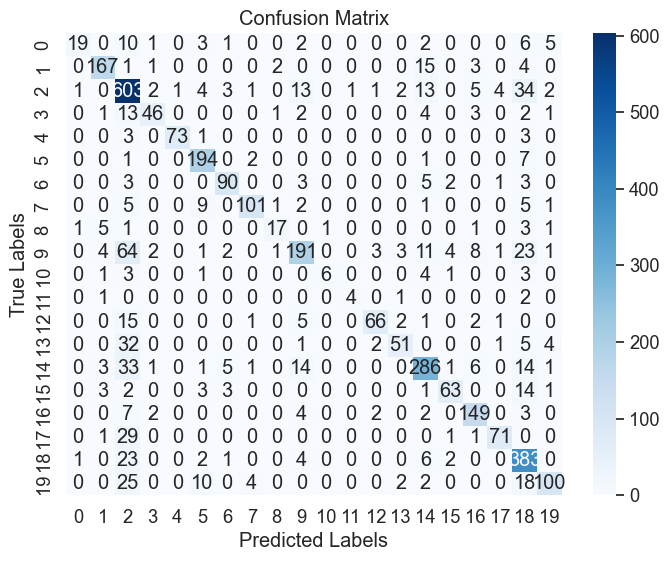

In [80]:
# Матриця заплутаності для Випадкового лісу
print('Random Forest Classifier:')
plot_confusion_matrix(y_test, rf_pred)

Спробуємо покращити моделі за допомогою  GridSearchCV

Naive Bayes

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Параметри для наївного байєсівського класифікатора
nb_params = {
    'alpha': [0.1, 0.3, 0.5, 0.8, 1.0],   # Згладжування 
    'fit_prior': [True, False]            # Чи навчати апріорні ймовірності класів
}

# Створення  класифікатору
nb_classifier = MultinomialNB()

# Пошук найкращих параметрів
nb_grid = GridSearchCV(nb_classifier, nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train_vectorized, y_train)

# Найкращі параметри для Наївного Байєса
print("The best params for Naive Bayes:", nb_grid.best_params_)

The best params for Naive Bayes: {'alpha': 0.3, 'fit_prior': False}


In [89]:
# Передбачення
nb_best_pred = nb_grid.predict(X_test_vectorized)

# Оцінка моделі
print('Naive Bayes Classifier + GridSearch\n')
print_metrics(y_test, nb_best_pred)

Naive Bayes Classifier + GridSearch

Accuracy: 0.7639788110653325
Precision: 0.7670954309685144
Recall: 0.7639788110653325
F1-Score: 0.7570598459489575


In [100]:
# Порівняння зі стандартними параметрами
print('Naive Bayes Classifier:\n')
print_metrics(y_test, nb_pred)

Naive Bayes Classifier:

Accuracy: 0.6065332548557976
Precision: 0.7222143585126949
Recall: 0.6065332548557976
F1-Score: 0.5626614685666059


Як бачимо, за допомогою GridSearch дійсно вдалося покращити модель. Спробуємо покращити Random Forest:

Random Forest Classifier

In [98]:
%%time

# Параметри для випадкового лісу
rf_params = {
    'n_estimators': [50, 100, 200, 500],     # Кількість дерев
    'max_depth': [None, 1, 5, 10],        # Максимальна глибина дерев
}

rf_classifier = RandomForestClassifier()

# GridSearch для випадкового лісу
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_vectorized, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 500}
CPU times: total: 14min 2s
Wall time: 30min 1s


In [99]:
# Передбачення
rf_best_pred = rf_grid.predict(X_test_vectorized)

# Оцінка моделі
print('Random Forest Classifier + GridSearch\n')
print_metrics(y_test, nb_best_pred)

Random Forest Classifier + GridSearch

Accuracy: 0.7639788110653325
Precision: 0.7670954309685144
Recall: 0.7639788110653325
F1-Score: 0.7570598459489575


In [101]:
# Порівняння зі стандартними параметрами
print('\nRandom Forest Classifier:\n')
print_metrics(y_test, rf_pred)


Random Forest Classifier:

Accuracy: 0.7886992348440259
Precision: 0.8010566286812867
Recall: 0.7886992348440259
F1-Score: 0.78441917442345


Для моделі Random Forest спостерігаємо незначні зміни. Точність навіть трохи зменшилась, а решта метрик дали кращий результат.